### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2020 ###

# Energy predicting and distribution #

#### Xinyi Feng (xfeng82@wisc.edu)
#### Qi Yao (qyao34@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##
As sustainability comes in the spotlight, renewable energy receives extensive study. One fresh idea to it in U.S. is the Interstate Energy Compact, aiming at promoting collaboration for energy use among states. In this paper, we formulate concrete objectives and actions on the use of renewable energy for such a compact among California (CA), Arizona (AZ), New Mexico (NM) and Texas (TX).

Except the renewable resources being produced, imported and consumped in the four states, the unrenewable resources, which majorly are fossile fuels, still constitute a large part of the resource market. The variations in this part of the resource market will definitely change the economy and daily life. Seeing the essential significant role of renewable resources, this project will spend attention on clarifying the tendencies in this area.

We intend to predict the energy usage of the next ten years based on the energy usage of the four states from 1970 to 2009, and establish an optimization model to reduce energy expenditures for these four states.\
And the date is from http://www.mathmodels.org/Problems/2018/MCM-C/index.html

First, draw a line graph of 40 years of data. In order to make the lines smoother and easier to predict later, I first fitted the data, using the trade-off and regression model. By adjusting the smoothness and error weights, I can find an balance between the smoothness of the curve after fitting and the degree of matching with the real data.

Because the data in the table is very cumbersome, there are a total of 605 variables, and many variables are related to each other and can be divided into the same category, I used the table to preprocess the data, and integrated the following new variables for use:

|Abbreviation|Full Name|
|------|---|
|RC|Renewable Consumption|
|UC|Unrenewable Consumption|
|RP|Renewable Production|
|UP|Unrenewable Production|
|RI|Renewable Import|
|RE|Renewable Export|
|RED|Renewable Expenditure|
|UED|Unrenewable Expenditure|
|PCD|Renewable Consumption-Production Difference|



## 2. Mathematical model ##
In the data processing stage, I use the trade-off and regression model:\
$$\min_{x} ||Ax-b||^2+\lambda||x||^2$$
After obtaining a reasonable x based on the training data set, predict the missing data.

In the energy distribution stage, I use the Min-Cost Network Flow (MCNF) model. 

## 3. Solution ##

### Fitting Function
In order to predict future energy consumption, imports and exports, etc., we adopt the Tradeoffs and Regularization to fit the data of the past few decades.

The reasonable choice of tradeoff value help us build a excellent fitting model that predicts the underlying training dataset well (low bias) and producing a model that doesn't change much with the training dataset (low variance).


We choose $\lambda=0.5$ as the trade-off value to fit a relatively smooth curve with little error from the original data set.

The objective function is $||Smoothness||+\lambda||Error||$, so large $\lambda$ will leads to smoother fitted curve; and smaller $\lambda$ will leads to smaller error with original data but it may cause overfitting.

In [1]:
#fitting model
using JuMP, Gurobi
function solveOpt(λ,u)
     m = Model(Gurobi.Optimizer)
    set_optimizer_attribute(m,"OutputFlag",0)
    @variable(m, p[1:40]>=0) #production of renewable energy in AZ
    
    @objective(m, Min, sum((p[2:40]-p[1:39]).^2)+ λ*sum( (p[1:40]-u[1:40]).^2 ) )
    optimize!(m)
    error=value(sum( (p[1:40]-u[1:40]).^2 )).^0.5
    smoothness=value(sum((p[2:40]-p[1:39]).^2)+ λ*sum( (p[1:40]-u[1:40]).^2 ))
    xopt = value.(p)
    return (error,smoothness,xopt)
end

solveOpt (generic function with 1 method)

### Predicting Function
I use part of historical data to make predictions for the next 10 years.\
Because some data fluctuate greatly, I will based on the data of recent years rather than the past few decades.

In [2]:
#prediction
using Convex, SCS

function solveOpt1(λ,b,span)
    x = Variable(3)
    A1=ones(span,1)
    A2=[i for i in 2010-span:2009]
    A3=[i.^2 for i in 2010-span:2009]
    A=[A1 A2 A3]
    b=b[end-span+1:end]
    
    problem = minimize(norm(A * x - b,2)+λ*norm(x,2))
    solve!(problem, SCS.Optimizer(verbose=false))
    println(problem.status)
    println(x.value)
    return x.value
end
year=[i for i in 1970:2009];

## Energy Proﬁle Analysis and Prediction

### Renewable Expenditure (RED)

The total expenditure of renewable energy is composed of Fuel ethanol and excluding denaturant(EMTCV), Electricity(ESTCV),Nuclear fuel(NUETV) and Wood and waste(WWTCV)'s total expenditures.

So we get the total expenditure of renewable energy  by the equation: $$RED=EMTCV+ESTCV+NUETV+ WWTCV$$

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
ALMOST_OPTIMAL


┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


[-0.07861772023780392; -78.8030707734218; 0.04073671187188517]
ALMOST_OPTIMAL
[-6468.131461823736; -1193.9690703536612; 0.6041895710363375]
ALMOST_OPTIMAL
[-0.37516400377322306; -375.9345940400621; 0.18791573766264064]


┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_INFEASIBLE; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


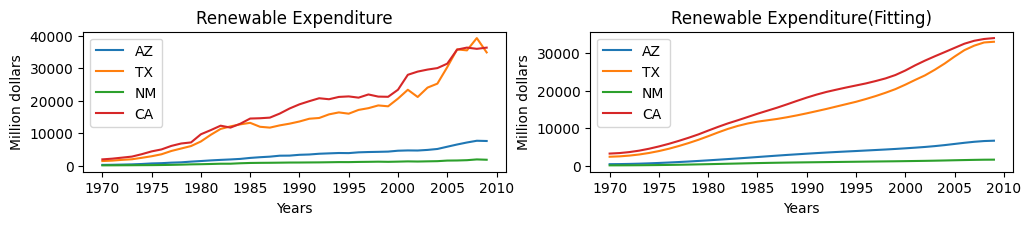

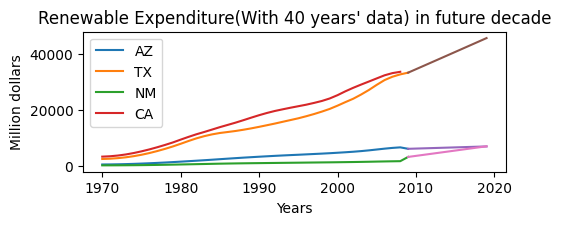

ALMOST_INFEASIBLE
[NaN; NaN; NaN]


PyObject <matplotlib.legend.Legend object at 0x7f27049e0cf8>

In [3]:
using PyPlot,PyCall,Convex, SCS
RED_AZ=[250.81574;281.98975;344.52488;413.20603;528.89461;698.31133;781.11293;943.00206;
    1042.08887;1260.331;1438.67983;1632.26342;1792.51171;1928.28664;2097.6365;2400.37468;
    2615.34581;2787.36871;3082.70829;3110.26364;3358.71978;3455.58215;3684.16668;3800.24367;
    3910.81016;3880.72786;4118.83943;4214.4792;4270.39955;4343.76184;4616.93279;4703.91549;
    4677.90715;4864.75526;5154.59;5848.13104;6531.17353;7151.69273;7683.59609;7611.48122]

RED_TX=[1438.18533;1568.20123;1802.4685;1981.73438;2432.313;2915.49005;3520.88247;4537.18236;
    5299.48849;6051.96579;7466.6194;9513.62245;11328.47209;12111.45261;12742.00028;13203.3842;
    11989.66443;11731.72356;12421.94811;12949.53854;13616.26983;14470.05152;14695.91527;15814.10075;
    16417.35731;16022.37852;17185.46356;17722.50418;18566.32067;18295.26036;20664.6054;23395.44971;
    21166.98575;24055.09419;25279.06043;30356.82028;35819.872;35526.50148;39307.4475;34894.545]

RED_NM=[107.46873;118.4856;134.20101;147.39748;168.09645;180.99432;214.07253;259.28415;327.38055;
    414.08866;462.75406;530.55247;609.07957;614.23293;755.17619;844.64457;881.33393;902.41154;
    935.20401;974.48193;981.76189;1005.82882;1025.97199;1066.33123;1111.5837;1106.56733;1163.08861;
    1194.67947;1240.38031;1194.74198;1255.9944;1331.0047;1285.20662;1344.30257;1398.7541;1579.36048;
    1609.54798;1700.52468;1936.14128;1835.97152]
RED_CA=[1949.06043;2169.05432;2486.80207;2807.32838;3549.43689;4410.59382;5015.47734;6098.16936;
    6841.83164;7174.10971;9685.65811;10958.68571;12327.89986;11736.67443;12935.07771;14527.59515;
    14618.98892;14809.15655;16054.99063;17624.54517;18901.48844;19875.17027;20779.36309;20473.1917;
    21186.26538;21346.03657;20961.35073;21945.17467;21286.1183;21223.37847;23395.96907;27999.77263;
    28986.90022;29609.60677;30064.97049;31426.99586;35753.95877;36378.67005;35995.46702;36367.36861]

figure(figsize=(12,4))
subplot(221)
plot(year,RED_AZ)
plot(year,RED_TX)
plot(year,RED_NM)
plot(year,RED_CA)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Expenditure")
legend(["AZ", "TX","NM","CA"])

λ=0.1
(error,smoothness,RED_AZ_opt)=solveOpt(λ,RED_AZ)
(error,smoothness,RED_TX_opt)=solveOpt(λ,RED_TX)
(error,smoothness,RED_NM_opt)=solveOpt(λ,RED_NM)
(error,smoothness,RED_CA_opt)=solveOpt(λ,RED_CA)

subplot(222)
plot(year,RED_AZ_opt)
plot(year,RED_TX_opt)
plot(year,RED_NM_opt)
plot(year,RED_CA_opt)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Expenditure(Fitting)")
legend(["AZ", "TX","NM","CA"])

span=10
P1=ones(11,1)
P2=[i for i in 2009:2019]
P3=[i.^2 for i in 2009:2019]
pre_year=[P1 P2 P3]
xopt=solveOpt1(λ,RED_AZ_opt,span)
pre_RED_AZ=pre_year*xopt
RED_AZ_opt[end]=pre_RED_AZ[1]

xopt=solveOpt1(λ,RED_TX_opt,span)
pre_RED_TX=pre_year*xopt
pre_RED_TX=pre_year*xopt
RED_TX_opt[end]=pre_RED_TX[1]

xopt=solveOpt1(λ,RED_NM_opt,span)
pre_RED_NM=pre_year*xopt
pre_RED_NM=pre_year*xopt
RED_NM_opt[end]=pre_RED_NM[1]

xopt=solveOpt1(λ,RED_CA_opt,span)
pre_RED_CA=pre_year*xopt
pre_RED_CA=pre_year*xopt
RED_CA_opt[end]=pre_RED_CA[1]


figure(figsize=(12,4))
subplot(221)
plot(year,RED_AZ_opt)
plot(year,RED_TX_opt)
plot(year,RED_NM_opt)
plot(year,RED_CA_opt)
plot(P2,pre_RED_AZ)
plot(P2,pre_RED_TX)
plot(P2,pre_RED_NM)
plot(P2,pre_RED_CA)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Expenditure(With 40 years' data) in future decade")
legend(["AZ", "TX","NM","CA"])


### Renewable Import (RI)
Because the annual renewable energy expenditure is constantly increasing, considering that it may be necessary to import and export energy to meet the demand, I analyzed the energy import and export expenses for the past 40 years.\
According to the table, electricity is the only renewable resource imported. We use this formula to calculate it:
$$RI=ELIMV$$

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
ALMOST_INFEASIBLE
[NaN; NaN; NaN]
ALMOST_OPTIMAL
[13982.38108173905; 55.77156876314483; -0.03130282626933882]


┌ Warning: Problem status ALMOST_INFEASIBLE; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


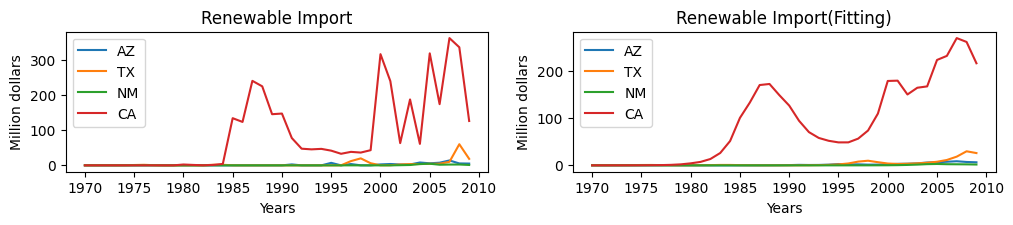

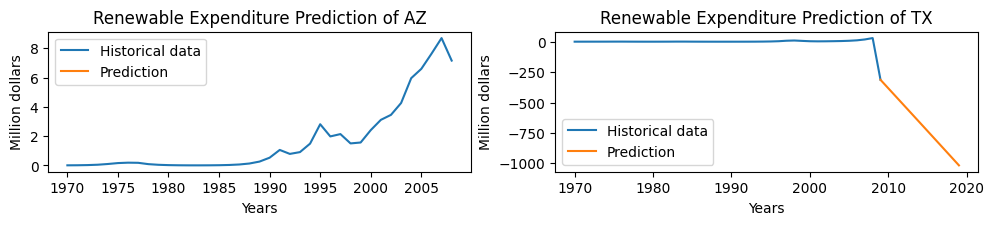

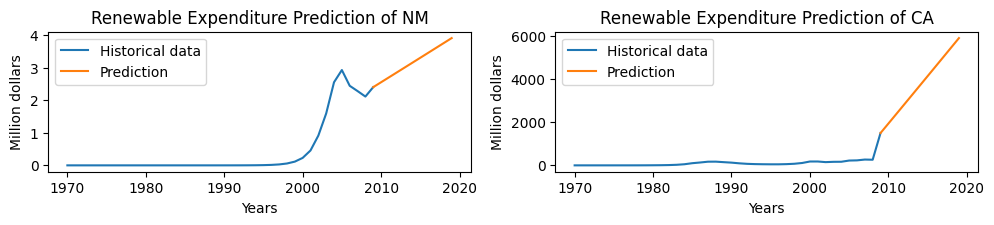

ALMOST_OPTIMAL
[-0.02182220406586912; -0.1474587377862288; 7.399960390947685e-5]
ALMOST_OPTIMAL
[24344.177493190382; -461.2712026112934; 0.22394212406478983]


┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


PyObject <matplotlib.legend.Legend object at 0x7f26d6528ef0>

In [4]:
RI_AZ=[0;0;0;0;0.07303;0.23446;0.26318;0.34467;0;0;0;0;0;0;0;0;0;0;0;0;0;2.66616;0;0;0.00046;
    7.13149;0;3.73696;0.10736;0;2.7039;3.83888;2.52181;2.48699;8.09003;5.81706;7.53642;13.92523;5.48284;5.079]
RI_TX=[0.24313;0.22389;0.43594;0.28364;0.35233;0.95066;1.53154;0.48119;0;0;0;0;0.06331;1.73423;
    1.65504;0.17195;0;0.01089;0;0.04032;0.03203;0.00034;0;0.00032;0.00152;0;0.12089;12.0486;
    19.81756;6.04876;0.13675;0.25176;2.44912;3.58654;3.73014;4.40581;4.69884;9.95233;59.9317;18.47303]
RI_NM=[0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.00172;0;0.46716;1.03648;
    3.72038;4.64416;1.79928;2.29338;2.43676;1.1222]
RI_CA=[0;0;0;0;0;0;0;0;0;0;2.40603;1.19859;0.18541;1.07007;4.07202;133.80328;123.15002;
    239.67325;224.09623;145.0889;146.91056;77.54304;47.24265;45.36716;46.75412;41.68839;32.83609;38.27097;36.28347;43.03918;315.37186;238.8915;63.05621;186.9527;60.95984;317.61828;173.50871;360.94512;334.86721;125.84173]

figure(figsize=(12,4))
subplot(221)
plot(year,RI_AZ)
plot(year,RI_TX)
plot(year,RI_NM)
plot(year,RI_CA)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Import")
legend(["AZ", "TX","NM","CA"])

λ=0.5
(error,smoothness,RI_AZ_opt)=solveOpt(λ,RI_AZ)
(error,smoothness,RI_TX_opt)=solveOpt(λ,RI_TX)
(error,smoothness,RI_NM_opt)=solveOpt(λ,RI_NM)
(error,smoothness,RI_CA_opt)=solveOpt(λ,RI_CA)

subplot(222)
plot(year,RI_AZ_opt)
plot(year,RI_TX_opt)
plot(year,RI_NM_opt)
plot(year,RI_CA_opt)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Import(Fitting)")
legend(["AZ", "TX","NM","CA"])

span=10
P1=ones(11,1)
P2=[i for i in 2009:2019]
P3=[i.^2 for i in 2009:2019]
pre_year=[P1 P2 P3]
xopt=solveOpt1(λ,RI_AZ_opt,span)
pre_RI_AZ=pre_year*xopt
RI_AZ_opt[end]=pre_RI_AZ[1]

xopt=solveOpt1(λ,RI_TX_opt,span)
pre_RI_TX=pre_year*xopt
pre_RI_TX=pre_year*xopt
RI_TX_opt[end]=pre_RI_TX[1]

xopt=solveOpt1(λ,RI_NM_opt,span)
pre_RI_NM=pre_year*xopt
pre_RI_NM=pre_year*xopt
RI_NM_opt[end]=pre_RI_NM[1]

xopt=solveOpt1(λ,RI_CA_opt,span)
pre_RI_CA=pre_year*xopt
pre_RI_CA=pre_year*xopt
RI_CA_opt[end]=pre_RI_CA[1]


figure(figsize=(12,4))
subplot(221)
plot(year,RI_AZ_opt)
plot(P2,pre_RI_AZ)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Expenditure Prediction of AZ")
legend(["Historical data","Prediction"])


subplot(222)
plot(year,RI_TX_opt)
plot(P2,pre_RI_TX)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Expenditure Prediction of TX")
legend(["Historical data","Prediction"])

figure(figsize=(12,4))
subplot(221)
plot(year,RI_NM_opt)
plot(P2,pre_RI_NM)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Expenditure Prediction of NM")
legend(["Historical data","Prediction"])

subplot(222)
plot(year,RI_CA_opt)
plot(P2,pre_RI_CA)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Expenditure Prediction of CA")
legend(["Historical data","Prediction"])


## Renewable Export (RE)
Through the analysis and forecast of the export of renewable energy over the years, I found that the export of AZ, TX and NM showed an overall downward trend. Only the export volume of CA increased this year.\
Based on the previously discovered CA’s sharp decline in energy imports these years, I think that may be CA’s production of renewable energy is huge.
$$RE=\frac{ELEXP*ELEXD}{0.00029307107*1000000}-ELEXV$$

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
OPTIMAL
[4.297543569631279e-9; 4.266721287783989e-6; -2.1262871805189263e-9]
ALMOST_DUAL_INFEASIBLE
[414.47697184695517; 10.318831003153488; -0.005248578710556748]
ALMOST_OPTIMAL
[0.0002975305538796842; 1.1811114690787408e-6; -6.622932495091577e-10]


┌ Warning: Problem status ALMOST_DUAL_INFEASIBLE; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


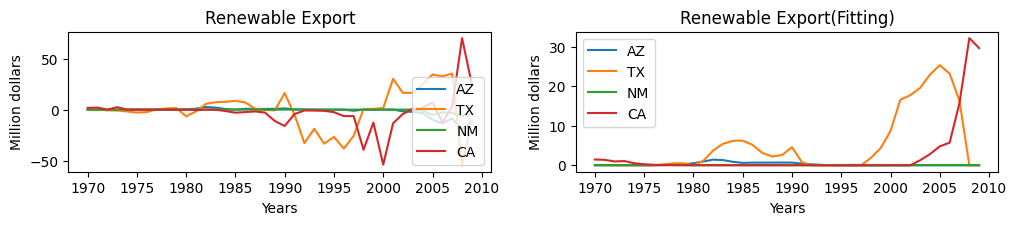

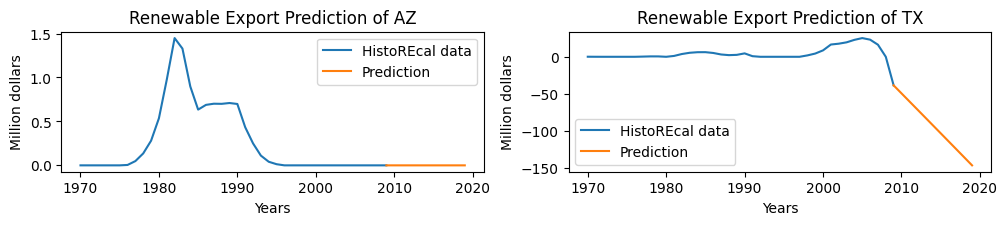

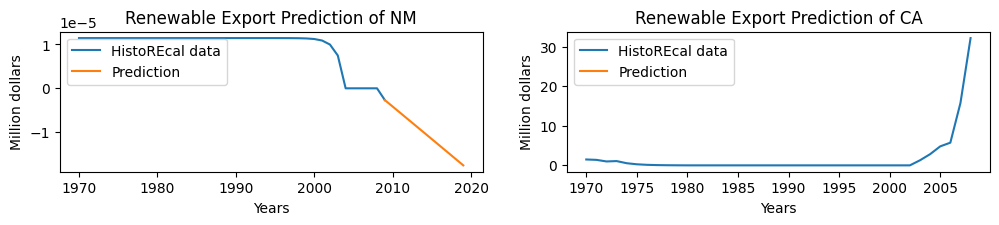

ALMOST_INFEASIBLE
[NaN; NaN; NaN]


┌ Warning: Problem status ALMOST_INFEASIBLE; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


PyObject <matplotlib.legend.Legend object at 0x7f26d6255048>

In [5]:
ELEXP_AZ=[14.9845;14.2277;20.5183;22.9603;25.3575;28.5527;30.4248;34.0973;37.71104;44.0679;
    51.36976;60.52752;132.53506;94.06932;28.76764;31.5436;38.39368;37.69776;35.8786;39.541;
    40.54;10.673;6.819;1.107;1.25;0;1.528;1.52;1.786;2.065;2.074;2.177;2.166;2.255;2.488;0.567;
    2.641;48.36;0;0;0;0;68.52477;71.0591;93.54995;179.29595;309.77789;220.94896;350.59231;354.01654]
ELEXP_TX=[207.87755;184.0872;172.50273;185.70769;130.36677;82.9049;90.73288;98.6464;112.755;
    145.7057;159.07836;193.5602;273.159;354.82633;382.94506;414.33209;349.60914;81.53788;16.53932;
    27.908;580.939;289.13;6.954;8.396;9.265;9.494;10.497;40.013;31.725;59.713;64.596;446.823;
    962.41;801.04;964.77;925.37;1029.628;1103.53;4.625;19.575;18.598;2.839;299.15523;296.6209;
    294.68305;297.81205;291.88311;402.73004;1012.87969;337.14646]
ELEXP_NM=[0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;
    0;0;0;22.224;97.762;64.851;61.505;118.004;115.399]
ELEXP_CA=[399.59696;439.87325;457.21964;445.1401;23.372;2.964;0;0;0;0;10.76061;10.89476;0;
    1.45479;0;0;0;0;0;0;12.82;35.264;0;6.877;68.291;142.899;114.262;88.583;145.118;558.729;
    523.792;167.628;25.311;45.872;101.41;228.484;283.356;351.817;1968.578;1263.94;2126.103;
    365.041;196.923;22.51;48.074;103.051;564.692;292.736;674.638;518.488]

ELEXD_AZ=[1.2653;1.36454;1.43897;1.55061;2.09643;2.56781;2.74148;3.10122;3.46096;3.78349;
    4.5774;5.32169;6.14041;6.15282;5.99156;0;6.11561;5.91844;5.83253;5.86292;9.18039;9.46799;
    10.05975;6.93441;10.2239;8.54156;10.98831;7.08249;0;0;0;0;7.19946;9.60208;10.87584;
    16.03628;12.95309;14.77134;15.86967;9.635]
ELEXD_TX=[1.2653;1.36454;1.43897;1.55061;2.09643;2.56781;2.74148;3.10122;3.46096;3.78349;
    4.5774;5.32169;6.14041;6.15282;5.99156;6.16523;6.11561;5.91844;5.83253;5.86292;9.18039;
    9.46799;10.05975;6.93441;10.2239;8.54156;10.98831;7.08249;6.31999;5.28003;9.85637;19.89946;
    7.19946;9.60208;10.87584;16.03628;12.95309;14.77134;15.86967;9.635]
ELEXD_NM=[0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;10.87584;16.03628;
    12.95309;14.77134;15.86967;9.635]
ELEXD_CA=[1.2653;1.36454;0;1.55061;0;0;0;0;0;0;4.5774;5.32169;0;6.15282;5.99156;6.16523;
    6.11561;5.91844;5.83253;5.86292;9.18039;9.46799;10.05975;6.93441;10.2239;8.54156;10.98831;
    7.08249;6.31999;5.28003;9.85637;19.89946;7.19946;9.60208;10.87584;16.03628;12.95309;14.77134;15.86967;9.635]

ELEXV_AZ=[0.22177;0.2818;0.65072;0.49769;0.20578;0.27637;0.35913;0.39889;0.42368;0.51045;0.63316;
    0.1938;0.14287;0.02324;0.02555;0;0.03188;0.03069;0.03554;0.04131;0.06496;0.07033;0.07435;
    0.05335;0.08679;0.01652;0.09902;1.16864;0;0;0;0;1.68328;2.32806;3.47149;9.81032;13.69093;
    11.13579;18.98363;11.63816]
ELEXV_TX=[0.68677;0.90118;1.34115;1.87727;2.73921;3.63012;3.27022;0.86278;0.19531;0.36027;
    9.07316;5.24991;0.14569;0.17626;0.18941;0.19971;0.21904;0.80801;0.63135;1.19452;2.02337;
    14.43452;33.03363;18.95277;33.65499;26.9688;38.60293;26.66731;0.09973;0.35265;0.62545;
    0.19276;7.34862;9.71798;10.93521;16.29502;12.90005;20.29752;54.84471;11.08356]
ELEXV_NM=[0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0.8247;5.34912;
    2.86615;3.09984;6.3896;3.7937]
ELEXV_CA=[0.04646;0.05072;0;0.0077;0;0;0;0;0;0;0.20022;0.64031;0;0.14437;1.39609;3.00599;
    2.38424;1.78882;2.88793;11.17697;16.40699;5.41519;0.86877;1.08534;3.53758;6.65889;
    10.62362;8.50182;42.45003;22.77046;71.5007;24.78517;4.83733;0.73748;1.78395;5.63852;
    24.9571;14.75384;36.52984;17.0451]

RE_AZ=[(ELEXP_AZ[i]*ELEXD_AZ[i])/(0.00029307107*1000000)-ELEXV_AZ[i] for i in 1:40]
RE_TX=[(ELEXP_TX[i]*ELEXD_TX[i])/(0.00029307107*1000000)-ELEXV_TX[i] for i in 1:40]
RE_NM=[(ELEXP_NM[i]*ELEXD_NM[i])/(0.00029307107*1000000)-ELEXV_NM[i] for i in 1:40]
RE_CA=[(ELEXP_CA[i]*ELEXD_CA[i])/(0.00029307107*1000000)-ELEXV_CA[i] for i in 1:40]
figure(figsize=(12,4))
subplot(221)
plot(year,RE_AZ)
plot(year,RE_TX)
plot(year,RE_NM)
plot(year,RE_CA)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Export")
legend(["AZ", "TX","NM","CA"])

λ=0.5
(error,smoothness,RE_AZ_opt)=solveOpt(λ,RE_AZ)
(error,smoothness,RE_TX_opt)=solveOpt(λ,RE_TX)
(error,smoothness,RE_NM_opt)=solveOpt(λ,RE_NM)
(error,smoothness,RE_CA_opt)=solveOpt(λ,RE_CA)

subplot(222)
plot(year,RE_AZ_opt)
plot(year,RE_TX_opt)
plot(year,RE_NM_opt)
plot(year,RE_CA_opt)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Export(Fitting)")
legend(["AZ", "TX","NM","CA"])


span=10
P1=ones(11,1)
P2=[i for i in 2009:2019]
P3=[i.^2 for i in 2009:2019]
pre_year=[P1 P2 P3]
xopt=solveOpt1(λ,RE_AZ_opt,span)
pre_RE_AZ=pre_year*xopt
RE_AZ_opt[end]=pre_RE_AZ[1]

xopt=solveOpt1(λ,RE_TX_opt,span)
pre_RE_TX=pre_year*xopt
pre_RE_TX=pre_year*xopt
RE_TX_opt[end]=pre_RE_TX[1]

xopt=solveOpt1(λ,RE_NM_opt,span)
pre_RE_NM=pre_year*xopt
pre_RE_NM=pre_year*xopt
RE_NM_opt[end]=pre_RE_NM[1]

xopt=solveOpt1(λ,RE_CA_opt,span)
pre_RE_CA=pre_year*xopt
pre_RE_CA=pre_year*xopt
RE_CA_opt[end]=pre_RE_CA[1]


figure(figsize=(12,4))
subplot(221)
plot(year,RE_AZ_opt)
plot(P2,pre_RE_AZ)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Export Prediction of AZ")
legend(["HistoREcal data","Prediction"])


subplot(222)
plot(year,RE_TX_opt)
plot(P2,pre_RE_TX)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Export Prediction of TX")
legend(["HistoREcal data","Prediction"])

figure(figsize=(12,4))
subplot(221)
plot(year,RE_NM_opt)
plot(P2,pre_RE_NM)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Export Prediction of NM")
legend(["HistoREcal data","Prediction"])

subplot(222)
plot(year,RE_CA_opt)
plot(P2,pre_RE_CA)
plt.ylabel("Million dollars")
plt.xlabel("Years")
plt.title("Renewable Export Prediction of CA")
legend(["HistoREcal data","Prediction"])

## Renewable energy total consumption(RETCB)

It is important for later optimization of energy distribution among states.

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
ALMOST_OPTIMAL
[-0.9591076987134722; -964.9132163442894; 0.505533196212119]
ALMOST_OPTIMAL
[-45881.2397743807; -22702.031891736176; 11.382882935071184]
ALMOST_OPTIMAL
[-3.3004007034032155; -3317.183776805924; 1.6599078322247385]


┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


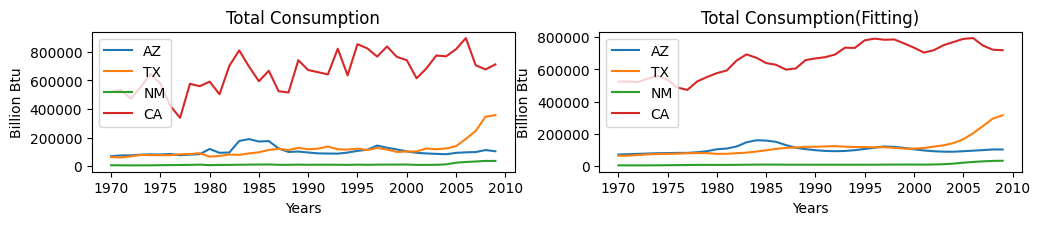

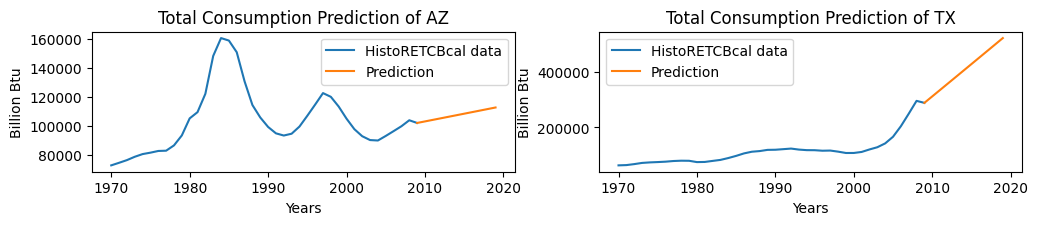

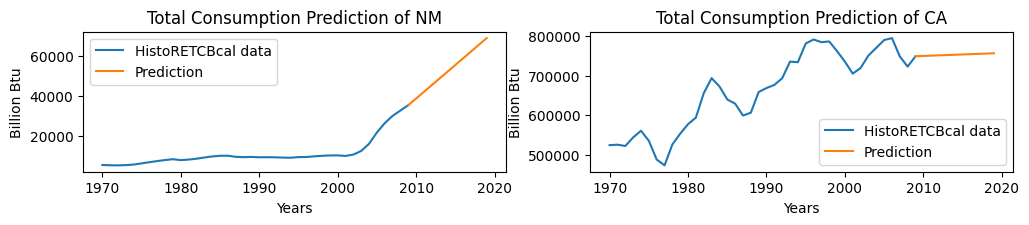

ALMOST_OPTIMAL
[-0.00013648775814533394; -0.13607976606903832; 0.18556572492043832]


┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


PyObject <matplotlib.legend.Legend object at 0x7f26d65f4588>

In [6]:
RETCB_AZ=[36181.45337;35082.71035;34533.37394;34861.20332;34270.82091;50095.02821;58059.82217;
    56422.66903;63456.3526;67840.06237;68919.16257;74136.25194;75188.74432;79348.45429;
    82058.08613;80897.34186;84428.48089;75680.87057;79869.7173;83413.77083;120006.4291;
    92583.03952;94968.34525;175999.0286;188831.349;171680.4225;175102.7767;123113.582;
    98749.30689;101553.8173;94816.36936;88844.17798;87592.987;87022.70044;94324.87168;
    106304.677;114186.1258;143638.9491;128258.1248;116535.3262;102625.9402;92736.79325;
    88265.46719;85280.50679;82799.60867;92489.6057;96082.13234;98077.97179;112169.6469;103493.2854]
RETCB_TX=[50154.98177;52022.85304;47721.24979;42717.86659;43884.2564;48966.77921;51980.12089;
    49944.1609;62938.87125;64351.45971;62756.82021;60470.71299;67559.72792;78101.59584;
    76691.32086;75871.68555;75964.66534;82565.80703;84175.21416;89720.8005;65818.6753;
    70515.77613;80753.13672;78067.25711;88645.53325;96301.17597;113055.793;120708.9929;
    111779.9304;127599.786;117295.1994;122321.6626;136108.7629;117754.1535;115392.3267;
    122114.8283;112113.7545;126386.4059;115580.3619;98999.84377;101768.2984;102051.7296;
    123453.1378;117846.7295;123193.9731;138956.3433;190304.644;245931.4351;346412.8352;356634.8206]
RETCB_NM=[7373.05583;6936.51555;6791.46314;6468.79948;6299.60702;6074.90564;6209.5118;
    5678.48447;5705.58598;5681.81484;5547.61237;4964.65394;4745.50766;4895.8681;4918.59476;
    6002.3454;6781.05597;7327.52063;7989.09471;9921.6861;6222.6322;7731.2666;8034.90149;
    9200.70962;9926.48398;10520.99098;11126.70674;8592.94641;8594.17854;9928.15283;8729.48362;
    9356.09125;9319.15144;8851.42503;8170.27972;9803.50494;8611.54468;9781.89609;10065.19479;
    10334.52736;10719.44735;7924.46009;8195.37527;8800.1346;11721.09552;23514.3723;28322.22471;
    31839.10226;35996.44258;35635.38371]
RETCB_CA=[270161.0892;248177.5248;329045.7467;360333.3104;331756.585;418517.8278;375877.0183;
    473191.9968;397365.9154;544918.0085;521978.1167;533790.0941;472311.9171;553161.7389;
    645073.0418;578577.8801;422851.6023;338072.6862;576600.8718;559805.6495;591927.6271;
    503653.7258;702807.7046;811006.1706;696739.9462;594659.3254;668070.3983;524441.4501;
    515856.1295;742317.8185;673021.572;658177.2104;642495.6129;822465.2016;636059.7725;
    854610.5196;824981.4822;767468.538;838296.0609;765491.9273;742639.4822;615357.5253;
    684706.464;775046.7826;769402.7643;818802.7598;897231.6446;706849.15;677502.4609;712704.4602]


figure(figsize=(12,4))
subplot(221)
plot(year,RETCB_AZ[11:50])
plot(year,RETCB_TX[11:50])
plot(year,RETCB_NM[11:50])
plot(year,RETCB_CA[11:50])
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Consumption")
legend(["AZ", "TX","NM","CA"])

λ=0.5
(error,smoothness,RETCB_AZ_opt)=solveOpt(λ,RETCB_AZ[11:50])
(error,smoothness,RETCB_TX_opt)=solveOpt(λ,RETCB_TX[11:50])
(error,smoothness,RETCB_NM_opt)=solveOpt(λ,RETCB_NM[11:50])
(error,smoothness,RETCB_CA_opt)=solveOpt(λ,RETCB_CA[11:50])

subplot(222)
plot(year,RETCB_AZ_opt)
plot(year,RETCB_TX_opt)
plot(year,RETCB_NM_opt)
plot(year,RETCB_CA_opt)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Consumption(Fitting)")
legend(["AZ", "TX","NM","CA"])

span=10
P1=ones(11,1)
P2=[i for i in 2009:2019]
P3=[i.^2 for i in 2009:2019]
pre_year=[P1 P2 P3]
xopt=solveOpt1(λ,RETCB_AZ_opt,span)
pre_RETCB_AZ=pre_year*xopt
RETCB_AZ_opt[end]=pre_RETCB_AZ[1]

xopt=solveOpt1(λ,RETCB_TX_opt,span)
pre_RETCB_TX=pre_year*xopt
pre_RETCB_TX=pre_year*xopt
RETCB_TX_opt[end]=pre_RETCB_TX[1]

xopt=solveOpt1(λ,RETCB_NM_opt,span)
pre_RETCB_NM=pre_year*xopt
pre_RETCB_NM=pre_year*xopt
RETCB_NM_opt[end]=pre_RETCB_NM[1]

xopt=solveOpt1(λ,RETCB_CA_opt,span)
pre_RETCB_CA=pre_year*xopt
pre_RETCB_CA=pre_year*xopt
RETCB_CA_opt[end]=pre_RETCB_CA[1]


figure(figsize=(12,4))
subplot(221)
plot(year,RETCB_AZ_opt)
plot(P2,pre_RETCB_AZ)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Consumption Prediction of AZ")
legend(["HistoRETCBcal data","Prediction"])


subplot(222)
plot(year,RETCB_TX_opt)
plot(P2,pre_RETCB_TX)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Consumption Prediction of TX")
legend(["HistoRETCBcal data","Prediction"])

figure(figsize=(12,4))
subplot(221)
plot(year,RETCB_NM_opt)
plot(P2,pre_RETCB_NM)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Consumption Prediction of NM")
legend(["HistoRETCBcal data","Prediction"])

subplot(222)
plot(year,RETCB_CA_opt)
plot(P2,pre_RETCB_CA)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Consumption Prediction of CA")
legend(["HistoRETCBcal data","Prediction"])




## Total consumption of unrenewable resources

Due to the absence of some data on resource production and consumption, like the shortage of import and prodcution of some fuels, here only three typical fuels, including coal, fuel ethanol and natural gas, are considered. Firstly, we would like to check the total consumption of these fuels.

In [7]:
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
import warnings

LoadError: syntax: extra token "as" after end of expression

In [8]:
with open('ProblemCData.csv') as f:
    df_origin = pd.read_csv(f)
    
df_origin

LoadError: syntax: extra token "open" after end of expression

In [9]:
States = ['AZ', 'CA', 'NM', 'TX']
warnings.filterwarnings('ignore')

#Keys = ['ARTCV', 'AVTCV', 'CLTCV', 'DFTCV', 'EMTCV','JFTCV', 'KSTCV', 'LGTCV', 'MGTCV', 'NGTCV', 'P1TCV', 'PCTCV', 'POTCV', 'RFTCV']
#only the production and consumption of 'Coal', 'Fuel ethanol', 'Natural gas'
Keys = ['CLTCV', 'EMTCV', 'NGTCV']

df_UED = df_origin[df_origin['MSN'] == Keys[0]]

df_UED.iloc[:,0] = 'UED'

for i in range(len(Keys)):
    df_storage = df_origin[df_origin['MSN'] == Keys[i]].head(160)
    if i != 0:
        for j in range(160):
            df_UED.iloc[j,3] = df_UED.iloc[j,3] + df_storage.iloc[j,3]
df_UED

LoadError: syntax: invalid character literal

In [10]:
#Keys = ['ARTCP', 'AVTCP', 'CLTCP', 'DFTCP', 'EMTCP','JFTCP', 'KSTCP', 'LGTCP', 'MGTCP', 'NGTCP', 'P1TCP', 'PCTCP', 'POTCP', 'RFTCP']
Keys = ['CLTCP', 'ENACP', 'ENCCP', 'ENICP', 'NGTCP']

df_UC = df_origin[df_origin['MSN'] == Keys[0]]

df_UC.iloc[:,0] = 'UC'

for i in range(len(Keys)):
    df_storage = df_origin[df_origin['MSN'] == Keys[i]].head(200)
    #print('i=', i)
    if i != 0:
        for j in range(200):
            if df_storage.shape[0] == 200:
                df_UC.iloc[j,3] = df_UC.iloc[j,3] + df_storage.iloc[j,3]
df_UC

LoadError: syntax: invalid character literal

In [11]:
Keys = ['CLPRB', 'ENPRP', 'NGMPB']

df_UP = df_origin[df_origin['MSN'] == Keys[0]]

df_UP.iloc[:,0] = 'UP'

for i in range(len(Keys)):
    df_storage = df_origin[df_origin['MSN'] == Keys[i]].head(200)
    if i != 0:
        for j in range(200):
            if df_storage.shape[0] == 200:
                df_UP.iloc[j,3] = df_UP.iloc[j,3] + df_storage.iloc[j,3]
df_UP

LoadError: syntax: invalid character literal

### Here are the tendencies of resourse consumption.

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

for i in range(len(States)):
    df = df_UED[df_UED['StateCode'] == States[i]]
    ax.plot(df.iloc[:,2], df.iloc[:,3], '-')
ax.set_ylabel('Billion dollars', fontsize=20)
ax.legend(States, fontsize=20)
ax.set_title('Total expenditure on unrenewable resources',fontsize=20,color='k');

LoadError: syntax: line break in ":" expression

In [13]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

for i in range(len(States)):
    df = df_UC[df_UC['StateCode'] == States[i]]
    ax.plot(df.iloc[:,2], df.iloc[:,3], '-')
ax.set_ylabel('Unit', fontsize=20)
ax.legend(States, fontsize=20)
ax.set_title('Total consumptiof on unrenewable resources',fontsize=20,color='k');

LoadError: syntax: line break in ":" expression

In [14]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

for i in range(len(States)):
    df = df_UP[df_UP['StateCode'] == States[i]]
    ax.plot(df.iloc[:,2], df.iloc[:,3], '-')
ax.set_ylabel('Billion Btu', fontsize=20)
ax.legend(States, fontsize=20)
ax.set_title('Total production of unrenewable resources',fontsize=20,color='k');

LoadError: syntax: line break in ":" expression

Roughly, the expenditure of unrenewable resources in Texas and California increased dramatically in forty years while the total consumption stayed at a relatively stable level. It is likely caused by the increase in energy prices. It is also not strange to see that the energy consumption in the two states maintain at a higher level compared to the other two states.

## The changes in each unrenewable resources

In [15]:
def dfselect(Keys, Mark, length):
    
    df_new = df_origin[df_origin['MSN'] == Keys[0]]
    
    df_new.iloc[:,0] = Mark
    
    for i in range(len(Keys)):
        df_storage = df_origin[df_origin['MSN'] == Keys[i]].head(length)
        #print('i=', i)
        if i != 0:
            for j in range(length):
                if df_storage.shape[0] == length:
                    df_new.iloc[j,3] = df_new.iloc[j,3] + df_storage.iloc[j,3]
    return df_new

LoadError: syntax: extra token "dfselect" after end of expression

In [16]:
def dataplot(df, unit, title):
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    
    for i in range(len(States)):
        df_p = df[df['StateCode'] == States[i]]
        ax.plot(df_p.iloc[:,2], df_p.iloc[:,3], '-')
    ax.set_ylabel(unit, fontsize=20)
    ax.set_title(title,fontsize=20,color='k')
    ax.legend(States, fontsize=20)

LoadError: syntax: extra token "dataplot" after end of expression

In [17]:
Keys = ['CLTCP']

df_UC_Coal = dfselect(Keys, 'UC_Coal', 200)
df_UC_Coal

LoadError: syntax: invalid character literal

In [18]:
dataplot(df_UC_Coal, 'Thousand short tons', 'Coal total consumption')

LoadError: syntax: invalid character literal

In [19]:
Keys = ['ENACP', 'ENCCP', 'ENICP']

df_UC_Fuelethanol = dfselect(Keys, 'UC_Fuelethanol', 200)
df_UC_Fuelethanol

LoadError: syntax: invalid character literal

In [20]:
dataplot(df_UC_Fuelethanol, 'Thousand barrels', 'Fuel ethanol, including denaturant total consumption')

LoadError: syntax: invalid character literal

In [21]:
Keys = ['NGTCP']

df_UC_Naturalgas = dfselect(Keys, 'Naturalgas', 200)
df_UC_Naturalgas

LoadError: syntax: invalid character literal

In [22]:
dataplot(df_UC_Naturalgas, 'Million cubic feet', 'Natural gas total consumption')

LoadError: syntax: invalid character literal

Obviously, the coal and fuel ethanol usage increased. But the coal consumption in California is stable, which shows the energy structures of Texas and California are different. And the natural gas is stably used in last years, showing unclear tendency.

In [23]:
Keys = ['CLPRP']

df_UP_Coal = dfselect(Keys, 'UP_Coal', 200)
df_UP_Coal

LoadError: syntax: invalid character literal

In [24]:
dataplot(df_UP_Coal, 'Thousand short tons', 'Coal total production')

LoadError: syntax: invalid character literal

In [25]:
Keys = ['ENPRP']
df_UP_Fuelethanol = dfselect(Keys, 'UP_Fuelethanol', 200)
df_UP_Fuelethanol

LoadError: syntax: invalid character literal

In [26]:
dataplot(df_UP_Fuelethanol, 'Thousand barrels', 'Fuel ethanol, including denaturant total production')

LoadError: syntax: invalid character literal

In [27]:
Keys = ['NGMPP']
df_UP_Naturalgas = dfselect(Keys, 'UP_Naturalgas', 200)
df_UP_Naturalgas

LoadError: syntax: invalid character literal

In [28]:
dataplot(df_UP_Naturalgas, 'Million cubic feet', 'Natural gas total production')

LoadError: syntax: invalid character literal

Obviously, the unrenewable resource production in these states has increased a lot except the natural gas. Then we are curious about the energy supply in these states:

In [29]:
df = df_UP_Coal

for j in range(len(df)):
    df.iloc[j,3] = df.iloc[j,3] - df_UC_Coal.iloc[j,3]

UndefVarError: UndefVarError: df_UP_Coal not defined

In [30]:
dataplot(df, 'Thousand short tons', 'Coal total production - consumption')

LoadError: syntax: invalid character literal

In [31]:
df = df_UP_Fuelethanol

for j in range(len(df)):
    df.iloc[j,3] = df.iloc[j,3] - df_UC_Fuelethanol.iloc[j,3]

UndefVarError: UndefVarError: df_UP_Fuelethanol not defined

In [32]:
dataplot(df, 'Thousand barrels', 'Fuel ethanol production - consumption')

LoadError: syntax: invalid character literal

In [33]:
df = df_UP_Naturalgas

for j in range(len(df)):
    df.iloc[j,3] = df.iloc[j,3] - df_UC_Naturalgas.iloc[j,3]

UndefVarError: UndefVarError: df_UP_Naturalgas not defined

In [34]:
dataplot(df, 'Million cubic feet', 'Natural gas total production - consumption')

LoadError: syntax: invalid character literal

Except the natural gas, three states witnessed the shortage of coal production and all the four states suffered shortage of fuel ethanol. However, the supply of natural gas in two states are rebundant. The shortage in Arizona and California can be balanced by the prodction in the other two states. In all, the optimization of resources distribution is not so necesaary in unrenewable resources. As for the coal and fuel ethanol, it is emergent to promote the production.

## Renewable energy total production(REPRB) 
As I have speculated before, CA’s renewable energy production has grown tremendously in recent years.\
And on the contrary, the production of AZ's renewable energy has decreased, even unable to meet local demand, which has led to a decrease in the export volume, and the import volume of AZ has also decreased. It may be because the import cost is too high and the domestic distribution is more cost-effective.

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
ALMOST_OPTIMAL
[1.1196258161220511; 1108.5966075292472; -0.5308487921532018]
ALMOST_OPTIMAL
[-2.1112157058267675e7; 1.4106162717941026e6; -698.4115740307175]


┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


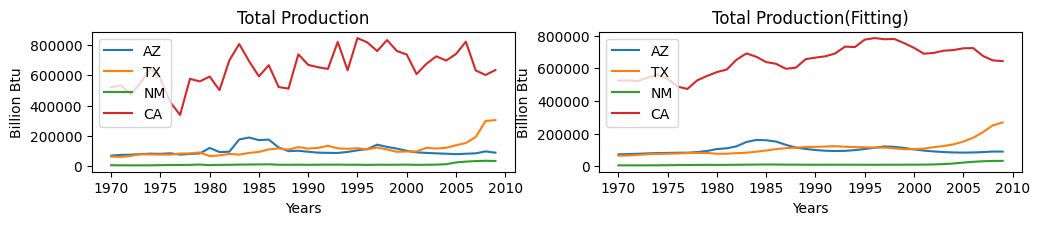

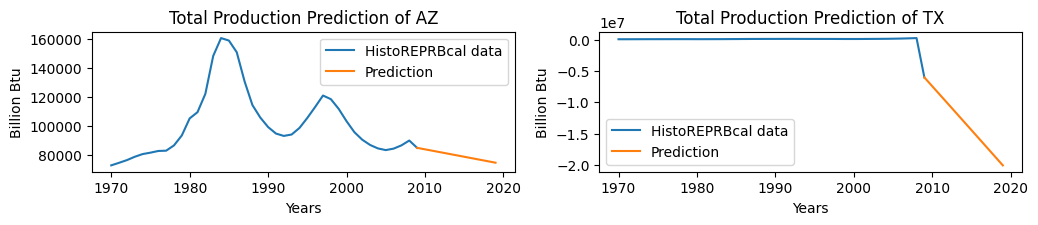

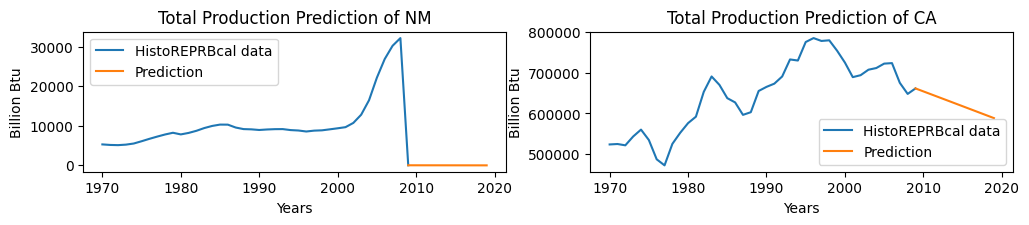

ALMOST_DUAL_INFEASIBLE
[-18.301716221937507; 1.9699391494913612; -0.0009780043971554702]
ALMOST_OPTIMAL
[7.842770639307613; 7887.640882040434; -3.7623136777086956]


┌ Warning: Problem status ALMOST_DUAL_INFEASIBLE; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/hp/.julia/packages/Convex/Y9BWU/src/solution.jl:228


PyObject <matplotlib.legend.Legend object at 0x7f26d3fef4a8>

In [35]:
REPRB_AZ=[36181.45337;35082.71035;34533.37394;34861.20332;34270.82091;50095.02821;58059.82217;
    56422.66903;63456.3526;67840.06237;68919.16257;74136.25194;75188.74432;79348.45429;82058.08613;
    80897.34186;84428.48089;75680.87057;79869.7173;83413.77083;120006.4291;92565.30497;94926.31913;
    175992.8019;188831.349;171680.4225;175102.7767;123113.582;98749.30689;101553.8173;94816.36936;
    88844.17798;87592.987;86746.38756;93601.96834;104031.3196;112268.7753;141734.1489;126789.6308;
    115266.0058;101173.029;90726.10341;87119.08004;84174.63139;81735.55497;78743.84169;81533.37169;
    84167.97886;97134.51742;88571.38442]
REPRB_TX=[50154.98177;52022.85304;47721.24979;42717.86659;43884.2564;48966.77921;51980.12089;
    49944.1609;62938.87125;64351.45971;62756.82021;60470.71299;67559.72792;78101.59584;76691.32086;
    75871.68555;75964.66534;82565.80703;84175.21416;89720.8005;65818.6753;70519.70929;80451.75036;
    75816.82064;87063.95791;93531.88383;110360.0582;116904.6119;108935.5132;125462.5766;115298.0231;
    120335.4345;133856.0867;117234.4637;114104.0195;117897.9075;110543.9195;122677.2841;110086.5272;
    94267.21986;96346.13836;96563.3496;121061.9406;115899.6095;120886.6667;137564.5865;152714.6303;
    192261.4163;298182.5907;303697.0626]
REPRB_NM=[7373.05583;6936.51555;6791.46314;6468.79948;6299.60702;6074.90564;6209.5118;5678.48447;
    5705.58598;5681.81484;5547.61237;4964.65394;4745.50766;4895.8681;4918.59476;6002.3454;6781.05597;
    7327.52063;7989.09471;9921.6861;6222.6322;7850.4533;8424.96074;9738.56586;10331.96832;
    10998.46499;11712.7992;8882.21042;8485.00705;9284.61705;8346.85973;9150.21571;9265.24712;
    9679.52988;8615.42933;9088.37558;7603.07227;9043.9492;8486.77166;9072.69223;9310.21296;
    8053.59275;8718.53593;9628.8265;12366.59947;24106.54545;29641.4582;33024.11335;35036.03687;33785.17435]
REPRB_CA=[270161.0892;248177.5248;329045.7467;360333.3104;331756.585;418517.8278;375877.0183;
    473191.9968;397365.9154;544918.0085;521978.1167;533790.0941;472311.9171;553161.7389;
    645073.0418;578577.8801;422851.6023;338072.6862;576600.8718;559805.6495;591927.6271;
    502231.5458;698981.1158;807127.7762;693614.2766;593488.3488;666981.2634;522673.4923;
    512100.1252;738965.0816;669385.4202;653580.5176;642312.7534;820857.3861;633675.3982;
    846265.1547;817765.8562;760363.1024;833063.9545;760981.8777;737522.9182;608143.3519;
    676324.8087;725742.0208;697820.3088;741050.6527;822410.1238;632367.5091;602233.0464;
    635062.3653]

figure(figsize=(12,4))
subplot(221)
plot(year,REPRB_AZ[11:50])
plot(year,REPRB_TX[11:50])
plot(year,REPRB_NM[11:50])
plot(year,REPRB_CA[11:50])
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Production")
legend(["AZ", "TX","NM","CA"])

λ=0.5
(error,smoothness,REPRB_AZ_opt)=solveOpt(λ,REPRB_AZ[11:50])
(error,smoothness,REPRB_TX_opt)=solveOpt(λ,REPRB_TX[11:50])
(error,smoothness,REPRB_NM_opt)=solveOpt(λ,REPRB_NM[11:50])
(error,smoothness,REPRB_CA_opt)=solveOpt(λ,REPRB_CA[11:50])

subplot(222)
plot(year,REPRB_AZ_opt)
plot(year,REPRB_TX_opt)
plot(year,REPRB_NM_opt)
plot(year,REPRB_CA_opt)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Production(Fitting)")
legend(["AZ", "TX","NM","CA"])

span=10
P1=ones(11,1)
P2=[i for i in 2009:2019]
P3=[i.^2 for i in 2009:2019]
pre_year=[P1 P2 P3]
xopt=solveOpt1(λ,REPRB_AZ_opt,span)
pre_REPRB_AZ=pre_year*xopt
REPRB_AZ_opt[end]=pre_REPRB_AZ[1]

xopt=solveOpt1(λ,REPRB_TX_opt,span)
pre_REPRB_TX=pre_year*xopt
pre_REPRB_TX=pre_year*xopt
REPRB_TX_opt[end]=pre_REPRB_TX[1]

xopt=solveOpt1(λ,REPRB_NM_opt,span)
pre_REPRB_NM=pre_year*xopt
pre_REPRB_NM=pre_year*xopt
REPRB_NM_opt[end]=pre_REPRB_NM[1]

xopt=solveOpt1(λ,REPRB_CA_opt,span)
pre_REPRB_CA=pre_year*xopt
pre_REPRB_CA=pre_year*xopt
REPRB_CA_opt[end]=pre_REPRB_CA[1]


figure(figsize=(12,4))
subplot(221)
plot(year,REPRB_AZ_opt)
plot(P2,pre_REPRB_AZ)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Production Prediction of AZ")
legend(["HistoREPRBcal data","Prediction"])


subplot(222)
plot(year,REPRB_TX_opt)
plot(P2,pre_REPRB_TX)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Production Prediction of TX")
legend(["HistoREPRBcal data","Prediction"])

figure(figsize=(12,4))
subplot(221)
plot(year,REPRB_NM_opt)
plot(P2,pre_REPRB_NM)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Production Prediction of NM")
legend(["HistoREPRBcal data","Prediction"])

subplot(222)
plot(year,REPRB_CA_opt)
plot(P2,pre_REPRB_CA)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Total Production Prediction of CA")
legend(["HistoREPRBcal data","Prediction"])


## Production-consumption difference(PCD) 
I forecasted the demand gap and renewable energy surplus in each state in the next ten years to prepare for energy distribution.\
As I expected, AZ has a large demand for renewable energy which cannot be met with its production. I plan to first consider allocating energy from other states, and then consider importing energy if the demand cannot be met. But obviously, because of CA’s abundant energy reserves, AZ does not need to import renewable energy
$$PCD=REPRB-RETCB$$

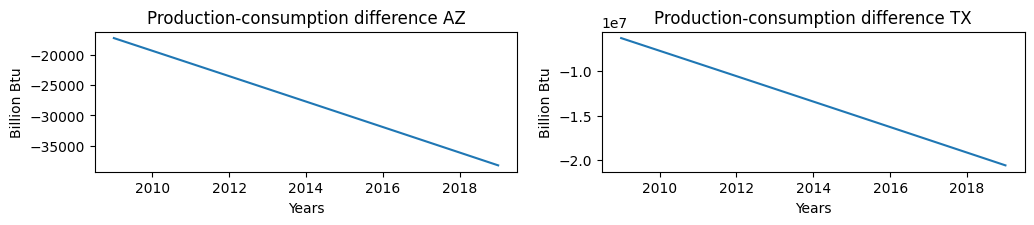

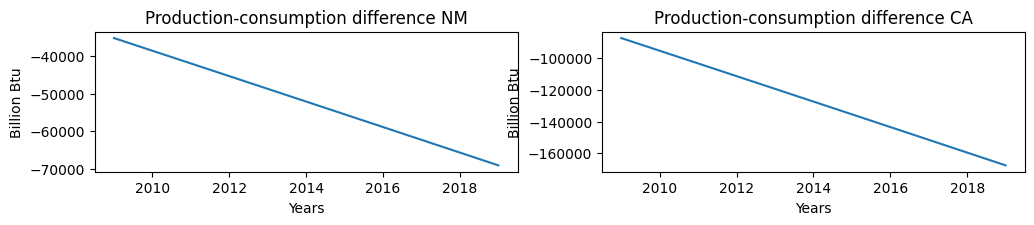

PyObject Text(0.5, 1.0, 'Production-consumption difference CA')

In [36]:
PCD_AZ=pre_REPRB_AZ-pre_RETCB_AZ
figure(figsize=(12,4))
subplot(221)
plot(P2,PCD_AZ)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Production-consumption difference AZ")

PCD_TX=pre_REPRB_TX-pre_RETCB_TX
subplot(222)
plot(P2,PCD_TX)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Production-consumption difference TX")

PCD_NM=pre_REPRB_NM-pre_RETCB_NM
figure(figsize=(12,4))
subplot(221)
plot(P2,PCD_NM)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Production-consumption difference NM")

PCD_CA=pre_REPRB_CA-pre_RETCB_CA
subplot(222)
plot(P2,PCD_CA)
plt.ylabel("Billion Btu")
plt.xlabel("Years")
plt.title("Production-consumption difference CA")

## Renewable Resource allocation optimization model
This is a Min-Cost Network Flow (MCNF) Problem

The cost of each arce is as below:

In [37]:
using JuMP, NamedArrays, Gurobi

state=[:AZ,:TX,:NM,:CA]

distance=[  0 826 422 737
            826 0 450 1047
            422 450 0 1002
            737 1047 1002 0]

println("The distance between states:")
c = NamedArray(distance,(state,state),("From","To"))

The distance between states:


4×4 Named Array{Int64,2}
From ╲ To │  :AZ   :TX   :NM   :CA
──────────┼───────────────────────
:AZ       │    0   826   422   737
:TX       │  826     0   450  1047
:NM       │  422   450     0  1002
:CA       │  737  1047  1002     0

In [38]:
Y=[:Y1,:Y2,:Y3,:Y4,:Y5,:Y6,:Y7,:Y8,:Y9,:Y10,:Y11]
PCD=[PCD_AZ PCD_TX PCD_NM PCD_CA];
println("The predicted production-consumption difference in the later 10 years:")
pcd=NamedArray(PCD,(Y,state),("Year","State"))

The predicted production-consumption difference in the later 10 years:


11×4 Named Array{Float64,2}
Year ╲ State │        :AZ         :TX         :NM         :CA
─────────────┼───────────────────────────────────────────────
:Y1          │   -17238.3  -6.31773e6    -35305.0    -87409.3
:Y2          │   -19330.0  -7.73707e6    -38660.9    -95388.0
:Y3          │   -21423.8  -9.15784e6    -42020.2   -103375.0
:Y4          │   -23519.7    -1.058e7    -45382.8   -111369.0
:Y5          │   -25617.6  -1.20036e7    -48748.7   -119372.0
:Y6          │   -27717.6  -1.34286e7    -52117.9   -127382.0
:Y7          │   -29819.7  -1.48551e7    -55490.5   -135400.0
:Y8          │   -31923.8   -1.6283e7    -58866.3   -143426.0
:Y9          │   -34030.0  -1.77122e7    -62245.5   -151460.0
:Y10         │   -36138.3  -1.91429e7    -65628.1   -159502.0
:Y11         │   -38248.7  -2.05751e7    -69013.9   -167552.0

Obviously, only AZ has more energy consumption than production, and CA has the most energy surplus.\
So I built the incidence matrix A as below:

In [39]:
# incidence matrix 
# (rows are nodes, columns are arcs, entries represent whether arc enters (-1) or leaves (1) each node)
A=[0 -1 0 0 0 -1 -1
    0 0 -1 -1 1 0 1
    -1 0 0 1 -1 1 0
    1 1 1 0 0 0 0]
# add a dummy arc from sink (AZ) to source (CA)
A =[A [1;0;0;-1]];

In [40]:
using Ipopt
for y in 1:11
    # supply and demand are all 0
    b=PCD[y,1:end]
    
    c=[1002 737 1047 450 450 422 826 -1]
    
    m = Model(Ipopt.Optimizer)
    set_optimizer_attribute(m,"print_level",0)

    @variable(m, x[1:8]>=0 )   
    @constraint(m, A*x .== b)
    @constraint(m,x[1]+x[2]+x[3]<=PCD[y,4])
    @constraint(m,x[4]+x[6]<=PCD[y,3])
    @constraint(m,x[5]+x[7]<=PCD[y,2])
    @constraint(m,x[8]<=10e20)
    @constraint(m,PCD[y,1]+x[5]+x[6]+x[7]>=0)
    @constraint(m,PCD[y,2]+x[3]+x[4]-x[5]-x[7]>=0)
    @constraint(m,PCD[y,3]+x[1]+x[4]+x[5]-x[6]>=0)
    @constraint(m,PCD[y,4]-x[1]-x[2]-x[3]>=0)
    @objective(m, Min, sum(c[i]*x[i] for i in 1:8))
    optimize!(m)
    x=value.(x)
    PCD[y,1]+=x[5]+x[6]+x[7]
    PCD[y,2]+=x[3]+x[4]-x[5]-x[7]
    PCD[y,3]+=x[1]+x[4]+x[5]-x[6]
    PCD[y,4]+=-x[1]-x[2]-x[3]
        
end
println("After sharing enery, all the states meet its consumption")
pcd_new=NamedArray(PCD,(Y,state));



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

After sharing enery, all the states meet its consumption


## 4. Results and discussion ##
The result is very close to what I have always predicted. The four states have continuously increased their demand for renewable energy in the past 40 years. This may be due to the increase in population and industrial development, but apart from CA, their production volume has not increased accordingly. Need to import resources or allocate resources domestically to meet local demand.

After forecasting the demand and production of each state in the next 10 years, I found that due to CA’s continuous increase in energy production and accumulated imported resources over the years, the renewable energy demand of each state can be met only by relying on domestic distribution. The cost of imported resources is much higher than the cost of transportation. I chose to distribute energy among the four states while minimizing transportation costs, and finally met the renewable energy needs of all states:

In [41]:
display(pcd_new)

11×4 Named Array{Float64,2}
A ╲ B │          :AZ           :TX           :NM           :CA
──────┼───────────────────────────────────────────────────────
:Y1   │     -17238.3    -6.28242e6  -0.000353039      -87409.3
:Y2   │     -19330.0    -7.69841e6  -0.000386598      -95388.0
:Y3   │     -21423.8    -9.11582e6  -0.000420191     -103375.0
:Y4   │     -23519.7    -1.05346e7  -0.000453816     -111369.0
:Y5   │     -25617.6    -1.19549e7  -0.000487477     -119372.0
:Y6   │     -27717.6    -1.33765e7  -0.000521169     -127382.0
:Y7   │     -29819.7    -1.47996e7  -0.000554894     -135400.0
:Y8   │     -31923.8    -1.62241e7  -0.000588653     -143426.0
:Y9   │     -34030.0      -1.765e7  -0.000622445     -151460.0
:Y10  │     -36138.3    -1.90773e7  -0.000656271     -159502.0
:Y11  │     -38248.7     -2.0506e7  -0.000690129     -167552.0

## 5. Conclusion ##
This project is a rough analysis since only part of variables has been taken into consideration. In the future, more variables can be analyzed in more detail to solve some problem that have not been resolved this time.

For example, why does CA continue to increase production and imports when production volume far exceeds demand?

And we only considered the transportation cost is considered proportional to the distance. In the future, multiple transportation methods can be considered, and a more optimized distribution plan can be designed according to the geographical characteristics of the states.